In [2]:
#A
#Initial analysis shows slight correlation between performance and valuation
#Additional analysis:

#B
#statistics - performance of low valuation sample compared to high valuation sample. lowest 10%.
#this is good.

#C
#logistic regression - probability. negative to positive returns. 
#FINAL['performance2'] = np.where(FINAL['performance']>=0, 1, 0)

#D
#linear regression - correlation matrix. multivariable correlation. dimensional analysis? combine valuation metrics?


In [3]:
#keep it simple with valuation metrics
#show that low value companies with growth outperform

In [4]:
import quandl
quandl.ApiConfig.api_key = 'FDE5zFj4jqNraFaz216a'

In [5]:
#CREATE REVENUE GROWTH TABLE

REVGROWTH = quandl.get_table('SHARADAR/SF1',calendardate={'lte':'2013-1-28'} ,qopts={'columns':['ticker' ,'dimension','datekey','REVENUE']})
#REVGROWTH[REVGROWTH['ticker']=='TCAP']

#note: to do eda by industry can get industry data from yahoo 

REVGROWTH['revgrowth']=REVGROWTH.groupby('ticker')['revenue'].pct_change()
REVGROWTH = REVGROWTH.dropna()

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/quandl/get_table.py:38: UserWarning: To request more pages, please set paginate=true in your         quandl.get_table() call. For more information see our documentation:         https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


In [6]:
#REVGROWTH

In [7]:
#type(table2['datekey'][1])

In [8]:
#import datetime
#table2[table2['datekey']>datetime.date(2016,1,1)]

In [9]:
#ADDING CURRENT PRICE TO TABLE

table = quandl.get_table('SHARADAR/SF1',calendardate={'lte':'2012-1-28'} ,qopts={'columns':['ticker' ,'dimension','datekey','EVEBITDA','PE1','PS1','PB','ROE','MARKETCAP','PRICE','DEBT','EBITDA','FCF','CASHNEQ','EV','REVENUE']})

#create a table 2 with current price concat on ticker

table2 = quandl.get_table('SHARADAR/SF1',qopts={'columns':['ticker','dimension','datekey','price'],'latest':1})

#table2['datekey']=table2['datekey'].astype(str)
#table2 = table2[table2['datekey'].str.contains('2017')]
#table2  = table2[table2['datekey']=='2017-12-31'].dropna()

#concat with table1 on ticker

tablef = table.merge(table2, left_on='ticker', right_on='ticker', how='inner')
tablef['performance'] = tablef['price_y']/tablef['price_x']

In [10]:
import pandas as pd

#CREATE VALUE METRICS

tablef = pd.DataFrame(tablef)

tablef['evrevenue'] = tablef['ev']/tablef['revenue']
tablef['evfcf'] = tablef['ev']/tablef['fcf']

In [11]:
tablef = tablef[['ticker','evrevenue','evfcf','pb','pe1','ps1','evebitda','performance','datekey_y','price_x']].dropna()
#tablef = tablef.merge(REVGROWTH, left_on='ticker', right_on='ticker', how='inner')
#inner join revenue growth
#remove negative ratios?

# TablePositive only positive ratios. Ratios as of EOY 2011

In [12]:
#only positive ratios
tablepos=tablef[tablef.iloc[:,0:7]>0].iloc[:,0:7].dropna()

#merger performance
tablepositive = tablepos.merge(tablef[['ticker','performance','datekey_y','price_x']], left_on='ticker', right_on='ticker', how='inner')

In [13]:
len(tablepositive)

2591

In [14]:
#BRING IN CURRENT STOCK PRICE

#import csv with performance
#merge with tablepositive

#IMPORT DATA


import pandas as pd
import numpy as np
file = '/Users/ryanpurcell/Desktop/PRICE.csv'
df = pd.read_csv(file,encoding = "ISO-8859-1", low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 2 columns):
Ticker    2589 non-null object
Price     2467 non-null float64
dtypes: float64(1), object(1)
memory usage: 40.5+ KB


In [15]:
tablepositive = tablepositive.merge(df, left_on='ticker', right_on='Ticker', how='inner')

In [16]:
tablepositive
tablepositive['performance'] = tablepositive['Price']/tablepositive['price_x']
len(tablepositive)

2587

In [17]:
tablepositive = tablepositive.dropna()
tablepositive = tablepositive[tablepositive['performance']<2000]
#tablepositive.sort_values('performance',ascending=True)

In [18]:
tablepositive =  tablepositive.merge(REVGROWTH, left_on='ticker', right_on='ticker', how='inner')

In [19]:
#table positive eda

#note: to do eda by industry can get industry data from yahoo 

#DATA by MARKET CAP
#DATA by INDUSTRY

In [20]:
tablepositive.corr().iloc[6:7,:]
#indicating slight correlations as expected

,evrevenue,evfcf,pb,pe1,ps1,evebitda,performance,price_x,Price,revenue,revgrowth
performance,-0.042159,-0.007446,-0.012619,-0.030511,-0.036014,0.003061,1.0,-0.028472,0.227984,-0.024141,0.025569


Creating Quartiles and comparing quartile performance by group

# By Quartile

In [21]:
np.percentile(tablepositive['revgrowth'], 25)

-0.010147987075003778

In [22]:
np.percentile(tablepositive['evebitda'], 75)

12.2775

In [28]:
#Table Positive by Quartile



#Top 25% for each valuation group
import numpy as np

FILTER4evfcf = tablepositive['evfcf'] > np.percentile(tablepositive['evfcf'], 75)
FILTER4evrev = tablepositive['evrevenue'] > np.percentile(tablepositive['evrevenue'], 75)
FILTER4pb = tablepositive['pb'] > np.percentile(tablepositive['pb'], 75)
FILTER4pe1 = tablepositive['pe1'] > np.percentile(tablepositive['pe1'], 75)
FILTER4ps1 = tablepositive['ps1'] > np.percentile(tablepositive['ps1'], 75)
FILTER4evebitda = tablepositive['evebitda'] > np.percentile(tablepositive['evebitda'], 75)
FILTER4revg = tablepositive['revgrowth'] > np.percentile(tablepositive['revgrowth'], 75)

#25% to 50% for each valuation grouping

FILTER2evfcf = (tablepositive['evfcf'] > np.percentile(tablepositive['evfcf'], 25)) & (tablepositive['evfcf'] <= np.percentile(tablepositive['evfcf'], 50))
FILTER2evrev = (tablepositive['evrevenue'] > np.percentile(tablepositive['evrevenue'], 25)) & (tablepositive['evrevenue'] <= np.percentile(tablepositive['evrevenue'], 50))
FILTER2pb = (tablepositive['pb'] > np.percentile(tablepositive['pb'], 25)) & (tablepositive['pb'] <= np.percentile(tablepositive['pb'], 50))
FILTER2pe1 = (tablepositive['pe1'] > np.percentile(tablepositive['pe1'], 25)) & (tablepositive['pe1'] <= np.percentile(tablepositive['pe1'], 50))
FILTER2ps1 = (tablepositive['ps1'] > np.percentile(tablepositive['ps1'], 25)) & (tablepositive['ps1'] <= np.percentile(tablepositive['ps1'], 50))
FILTER2evebitda = (tablepositive['evebitda'] > np.percentile(tablepositive['evebitda'], 25)) & (tablepositive['evebitda'] <= np.percentile(tablepositive['evebitda'], 50))
FILTER2revg = (tablepositive['revgrowth'] > np.percentile(tablepositive['revgrowth'], 25)) & (tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 50))

#50% to 75% for each valuation grouping

FILTER3evfcf = (tablepositive['evfcf'] > np.percentile(tablepositive['evfcf'], 50)) & (tablepositive['evfcf'] <= np.percentile(tablepositive['evfcf'], 75))
FILTER3evrev = (tablepositive['evrevenue'] > np.percentile(tablepositive['evrevenue'], 50)) & (tablepositive['evrevenue'] <= np.percentile(tablepositive['evrevenue'], 75))
FILTER3pb = (tablepositive['pb'] > np.percentile(tablepositive['pb'], 50)) & (tablepositive['pb'] <= np.percentile(tablepositive['pb'], 75))
FILTER3pe1 = (tablepositive['pe1'] > np.percentile(tablepositive['pe1'], 50)) & (tablepositive['pe1'] <= np.percentile(tablepositive['pe1'], 75))
FILTER3ps1 = (tablepositive['ps1'] > np.percentile(tablepositive['ps1'], 50)) & (tablepositive['ps1'] <= np.percentile(tablepositive['ps1'], 75))
FILTER3evebitda = (tablepositive['evebitda'] > np.percentile(tablepositive['evebitda'], 50)) & (tablepositive['evebitda'] <= np.percentile(tablepositive['evebitda'], 75))
FILTER3revg = (tablepositive['revgrowth'] > np.percentile(tablepositive['revgrowth'], 50)) & (tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 75))

#lowest 25% for each valuation grouping

FILTERevfcf = tablepositive['evfcf'] <= np.percentile(tablepositive['evfcf'], 25)
FILTERevrev = tablepositive['evrevenue'] <= np.percentile(tablepositive['evrevenue'], 25)
FILTERpb = tablepositive['pb'] <= np.percentile(tablepositive['pb'], 25)
FILTERpe1 = tablepositive['pe1'] <= np.percentile(tablepositive['pe1'], 25)
FILTERps1 = tablepositive['ps1'] <= np.percentile(tablepositive['ps1'], 25)
FILTERevebitda = tablepositive['evebitda'] <= np.percentile(tablepositive['evebitda'], 25)
FILTERrevg = tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 25)
FILTERrevgfcf = tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 25)

# Growth and EV/FCF

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


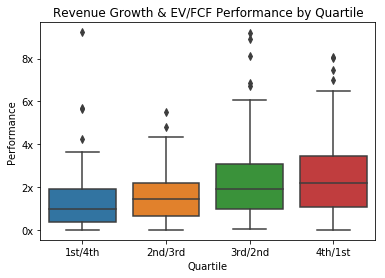

In [102]:
Dict1 = {'25': tablepositive[FILTERrevg][FILTER4evfcf].performance, '50' : tablepositive[FILTER2revg][FILTER3evfcf].performance, '75' : tablepositive[FILTER3revg][FILTER2evfcf].performance, '100' :tablepositive[FILTER4revg][FILTERevfcf].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("Revenue Growth & EV/FCF Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])

plt.xticks([0, 1, 2,3], ['1st/4th', '2nd/3rd', '3rd/2nd','4th/1st'])

plt.show()

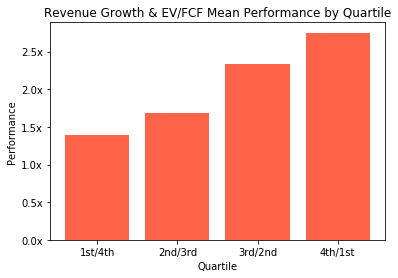

In [101]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("Revenue Growth & EV/FCF Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st/4th', '2nd/3rd', '3rd/2nd','4th/1st'])
plt.show()

# Growth

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


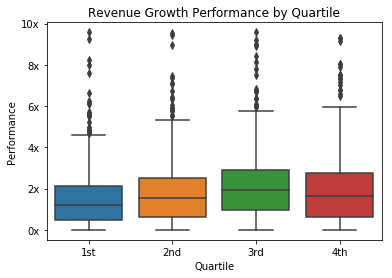

In [87]:
Dict1 = {'25': tablepositive[FILTERrevg].performance, '50' : tablepositive[FILTER2revg].performance, '75' : tablepositive[FILTER3revg].performance, '100' :tablepositive[FILTER4revg].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("Revenue Growth Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])

plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])

plt.show()

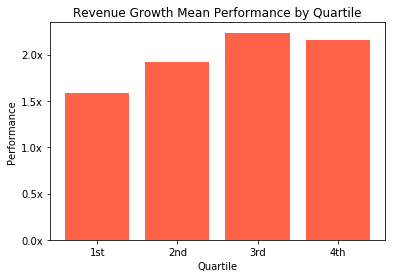

In [88]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("Revenue Growth Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

# EV / Rev

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


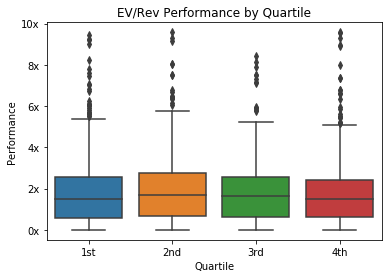

In [55]:
Dict1 = {'25': tablepositive[FILTERevrev].performance, '50' : tablepositive[FILTER2evrev].performance, '75' : tablepositive[FILTER3evrev].performance, '100' :tablepositive[FILTER4evrev].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("EV/Rev Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])

plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])

plt.show()

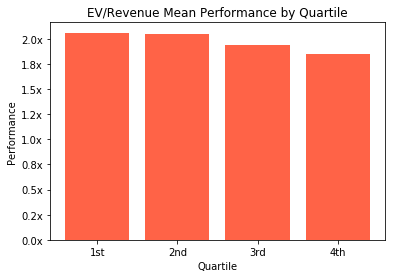

In [56]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("EV/Revenue Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [ ]:
#t-test comparing top 25 to bottom 25

import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)


# ev / fcf

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


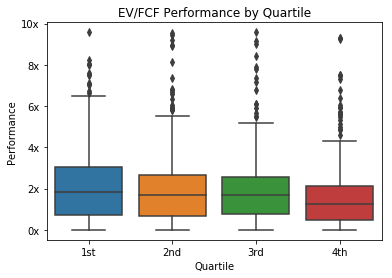

In [44]:
Dict1 = {'25': tablepositive[FILTERevfcf].performance, '50' : tablepositive[FILTER2evfcf].performance, '75' : tablepositive[FILTER3evfcf].performance, '100' :tablepositive[FILTER4evfcf].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("EV/FCF Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [95]:
df[df['Quartile']==25]['Performance'].mean()

1.3881937243518547

In [96]:
df[df['Quartile']==100]['Performance'].mean()

2.7506393649943433

In [97]:
df[df['Quartile']==25]['Performance'].median()

0.9805183320741291

In [98]:
df[df['Quartile']==100]['Performance'].median()

2.236352896279576

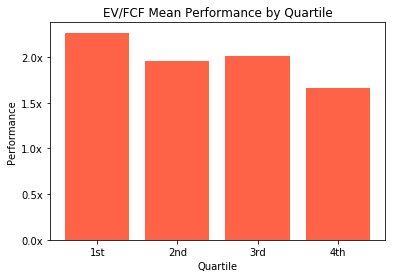

In [45]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("EV/FCF Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [ ]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

# pb

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


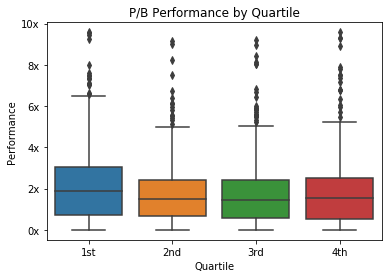

In [63]:
Dict1 = {'25': tablepositive[FILTERpb].performance, '50' : tablepositive[FILTER2pb].performance, '75' : tablepositive[FILTER3pb].performance, '100' :tablepositive[FILTER4pb].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("P/B Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

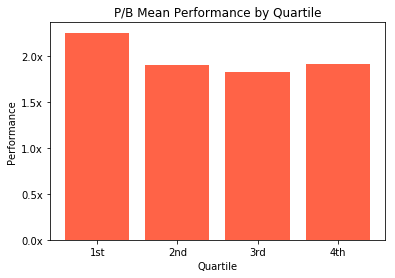

In [64]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("P/B Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [ ]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

# pe1

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


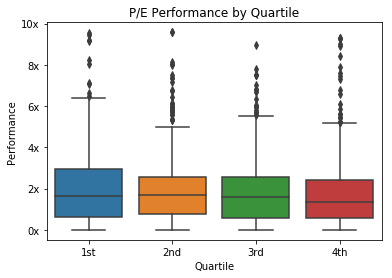

In [69]:
Dict1 = {'25': tablepositive[FILTERpe1].performance, '50' : tablepositive[FILTER2pe1].performance, '75' : tablepositive[FILTER3pe1].performance, '100' :tablepositive[FILTER4pe1].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("P/E Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

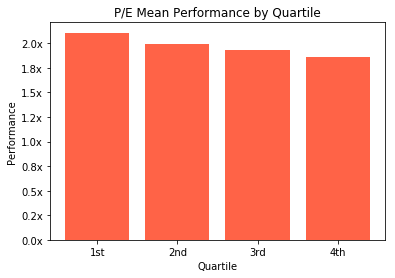

In [70]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("P/E Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [ ]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

# ps1

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


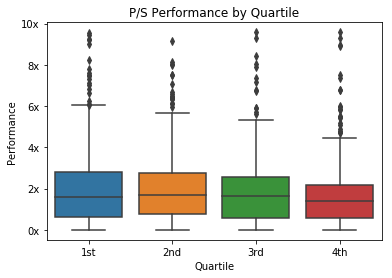

In [75]:
Dict1 = {'25': tablepositive[FILTERps1].performance, '50' : tablepositive[FILTER2ps1].performance, '75' : tablepositive[FILTER3ps1].performance, '100' :tablepositive[FILTER4ps1].performance}
df = pd.DataFrame(Dict1)
df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df['Quartile'] = df['Quartile'].astype('int') 
df=df.drop(['a'], axis=1)
#order=df.sort_values('Quartile')
order = sorted(df.Quartile.unique())

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("P/S Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance",order=order,data=df[filter1])
#sns.swarmplot(x="Quartile", y="Performance", data=df)
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

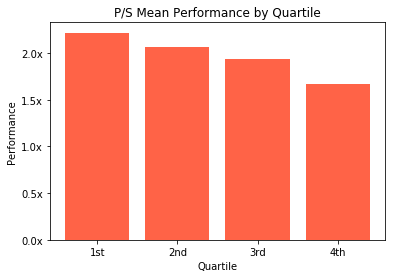

In [76]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("P/S Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [ ]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

# ev / ebitda

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


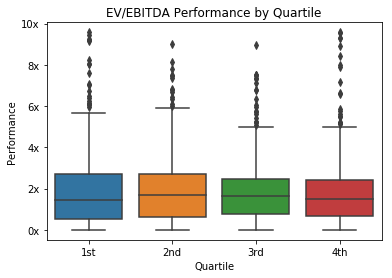

In [81]:
Dict1 = {'25': tablepositive[FILTERevebitda].performance, '50' : tablepositive[FILTER2evebitda].performance, '75' : tablepositive[FILTER3evebitda].performance, '100' :tablepositive[FILTER4evebitda].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

#df['normalized'] = (df['Performance'] - df['Performance'].min()) / (df['Performance'].max() - df['Performance'].min())

filter1 = df['Performance'] < 10

#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#x = sns.boxplot(x=df["100"])

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("EV/EBITDA Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

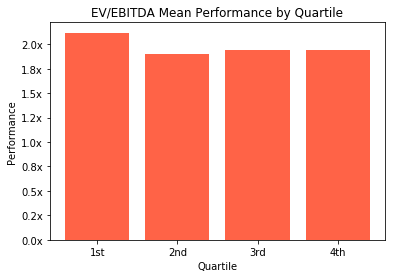

In [82]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("EV/EBITDA Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])

plt.show()

In [ ]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

# Random Forest

In [ ]:
X = tablepositive[['evrevenue','pb','pe1','ps1','evfcf','evebitda']]
y = tablepositive['performance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', random_state=1,n_jobs = -1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_train_pred.mean()

In [ ]:
X.describe()

In [ ]:
X25 = X[(X['evrevenue']<= np.percentile(X['evrevenue'], 25)) & (X['pb']<=np.percentile(X['pb'], 25)) & (X['pe1']<=np.percentile(X['pe1'], 25)) & (X['ps1']<=np.percentile(X['ps1'], 25)) & (X['evfcf']<=np.percentile(X['evfcf'], 25)) & (X['evebitda']<=np.percentile(X['evebitda'], 25))]

X100 = X[(X['evrevenue']>=np.percentile(X['evrevenue'], 75)) & (X['pb']>=np.percentile(X['pb'],75)) & (X['pe1']>=np.percentile(X['pe1'], 75)) & (X['ps1']>=np.percentile(X['ps1'], 75)) & (X['evfcf']>=np.percentile(X['evfcf'], 75)) & (X['evebitda']>=np.percentile(X['evebitda'], 75))]

In [ ]:
y_train_pred = forest.predict(X25)
y_train_pred.mean()

In [ ]:
y_train_pred = forest.predict(X100)
y_train_pred.mean()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Gradiant Boost Regression

In [ ]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
#boston = datasets.load_boston()
#X, y = shuffle(boston.data, boston.target, random_state=13)
#X = X.astype(np.float32)

#X = finalDf['principal component 1'].values.reshape(-1, 1)
#y = finalDf['performance'].values

X = tablepositive[['evrevenue','pb','pe1','ps1','evfcf','evebitda']]

Y = tablepositive['performance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


#subtracting last item into target
#offset = int(X.shape[0] * 0.9)
#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': .1, 'loss': 'ls','criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

#add space between plots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=None)

plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)

#sort features by feature importance for graph legend
dict1 = dict(zip(features, feature_importance))
import operator
sorted_d = sorted(dict1.items(), key=operator.itemgetter(1))
sorted_d = list(dict(sorted_d).keys())

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, sorted_d)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
#boston = datasets.load_boston()
#X, y = shuffle(boston.data, boston.target, random_state=13)
#X = X.astype(np.float32)

#X = finalDf['principal component 1'].values.reshape(-1, 1)
#y = finalDf['performance'].values

X = tablepositive[['evrevenue','pb','pe1','ps1','evfcf','evebitda']]

Y = tablepositive['performance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


#subtracting last item into target
#offset = int(X.shape[0] * 0.9)
#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': .1, 'loss': 'ls','criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

#add space between plots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=None)

plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)

#sort features by feature importance for graph legend
dict1 = dict(zip(features, feature_importance))
import operator
sorted_d = sorted(dict1.items(), key=operator.itemgetter(1))
sorted_d = list(dict(sorted_d).keys())

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, sorted_d)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
dict1 = dict(zip(features, feature_importance))

In [ ]:
dict1

In [ ]:
sorted_d

In [ ]:
list(dict(sorted_d).keys())

In [ ]:
features

In [ ]:
feature_importance

In [ ]:
['evrevenue','pb','pe1','ps1','evfcf','evebitda']
feature_importance[sorted_idx]

In [ ]:
y_train_pred = clf.predict(X_train)
y_train_pred.mean()

In [ ]:
y_train_pred = clf.predict(X25)
y_train_pred.mean()

In [ ]:
y_train_pred = clf.predict(X100)
y_train_pred.mean()

In [ ]:
test_score[3]

In [ ]:
#Gradiant Booster Regression
#mse between actual and predicted.

In [ ]:
#select sample with highest probability of positive performance...

In [ ]:
#upsample 0 data and logistic regression to select stocks based on valuation data...
#data is ok as all numerical. does not need to be changed to binary
#probability that below 25% quantile belong to positive class vs rest.
#mean of valuation metrics selected by logistic model
#0 to 1 for data above 25% quantile

In [ ]:
#With growth FCF outperforms. With all PB outperforms. All value metrics outperform overall portfolio
#P/B and P/FCF less manipulated
#redo analysis with tablefrg
#make performance charts to compare data

In [ ]:
#WEEKLY CALL QUESTIONS
#Paramaters
#clf.loss_(y_test, y_pred)